Repair

# Cleaning

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Load the dataframe from a csv file
df_cf = pd.read_csv('Generated_CFs/cf_df_12000_2_1.csv')

In [3]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

In [4]:
start_index = 1 + len(df)  # Calculate the starting index
new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
df_cf_reset.index = new_index  # Set the new index
df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
df_cf.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the 'Unnamed: 0' column

In [5]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

C:\Users\dideu\AppData\Local\Temp\ipykernel_1696\3457457334.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('.', '')


In [6]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)
df.drop(columns=['education', 'occupation', 'native-country'], inplace=True)

# Plots for creating feature importance plot

In [7]:
auc_df = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_10_20_30_40_perc.xlsx')
auc_onlycf_df = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_only_with_cfs_10_20_30_40_perc.xlsx')

In [8]:
auc_onlycf_df.head()

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,X_fit Size,F1 (%),F1 (%)_std,AUC (%),AUC (%)_std
0,0,RF_default_mean_of_iterations,5,0,0,31655,0.667017,0.001292,0.769223,0.000839
1,1,LR_default_mean_of_iterations,5,0,0,31655,0.397925,0.000000,0.618799,0.000000
2,2,LR_sample:3166_cf:1_mean_of_5_iterations,5,3166,1,3166,0.151941,0.016312,0.540770,0.004657
3,3,LR_sample:3166_cf:2_mean_of_5_iterations,5,3166,2,6332,0.158186,0.007765,0.542618,0.002336
4,4,LR_sample:6331_cf:1_mean_of_5_iterations,5,6331,1,6331,0.163924,0.003101,0.544290,0.000922


In [9]:
# Get the AUC score for the LR default model
lr_default_auc =  auc_df[auc_df['Model'].str.startswith('LR_default')]['AUC (%)'].iloc[0]
auc_scores = auc_df['AUC (%)'][2:].tolist()

rf_default_auc =  auc_df[auc_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]

lr_default_auc_cf =  auc_onlycf_df[auc_onlycf_df['Model'].str.startswith('LR_default')]['AUC (%)'].iloc[0]
auc_scores_cf = auc_onlycf_df['AUC (%)'][2:].tolist()



In [10]:
from scipy.stats import ks_2samp
import pandas as pd

def ks_test_all_features(original_df, cf_df):
    results = {}
    # Iterate over columns in the original dataframe
    for column in original_df.columns:
        # Check if the column exists in the counterfactual dataframe and both columns are not empty
            # Apply the KS test
        stat, p_value = ks_2samp(original_df[column].dropna(), cf_df[column].dropna())
        results[column] = {'KS Statistic': stat}

    return results

# Example usage assuming original_df and cf_df have been preprocessed
ks_results = ks_test_all_features(df, df_cf)
ks_results_df = pd.DataFrame(ks_results).T
print(ks_results_df)


# Calculate the mean of the KS statistics
mean_ks_statistic = ks_results_df['KS Statistic'].mean()
print("Mean KS Statistic:", mean_ks_statistic)


                KS Statistic
age                 0.044505
workclass           0.036455
fnlwgt              0.007413
education-num       0.053734
marital-status      0.035963
relationship        0.046157
race                0.062017
sex                 0.019131
capital-gain        0.590358
capital-loss        0.169470
hours-per-week      0.042281
income              0.502948
Mean KS Statistic: 0.13420257562690727


In [11]:
list_1 = [3166, 6331, 9495, 12000]
list_2 = [1, 2]

list_3 = [1,2,3,4,5] #iterations

In [12]:
ks_results_list = [] 
for i in list_1:
    for t in list_2:
        for z in list_3:
            df_cf = pd.read_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(i,t, z), index_col=0)
            start_index = 1 + len(df)  # Calculate the starting index
            new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
            df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
            df_cf_reset.index = new_index  # Set the new index
            df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
            ks_results = ks_test_all_features(df, df_cf)
            ks_results_df = pd.DataFrame(ks_results).T
            mean_ks_statistic = ks_results_df['KS Statistic'].mean()
            ks_results_list.append(mean_ks_statistic)

getting the average of every iteration

In [13]:
# Create a new list that gets the means of every 5 number
new_list = [(ks_results_list[i] + ks_results_list[i + 1]+ ks_results_list[i + 2] + ks_results_list[i + 3] + ks_results_list[i + 4] ) / 5 for i in range(0, len(ks_results_list) - 1, 5)]


# Print the new list
print(new_list)
ks_results_list = new_list.copy()

[0.11114606350092124, 0.11185882374311204, 0.11149855888122465, 0.1109253510326492, 0.10997479615454635, 0.11029401299618621, 0.1341660821429098, 0.1341698972107971]


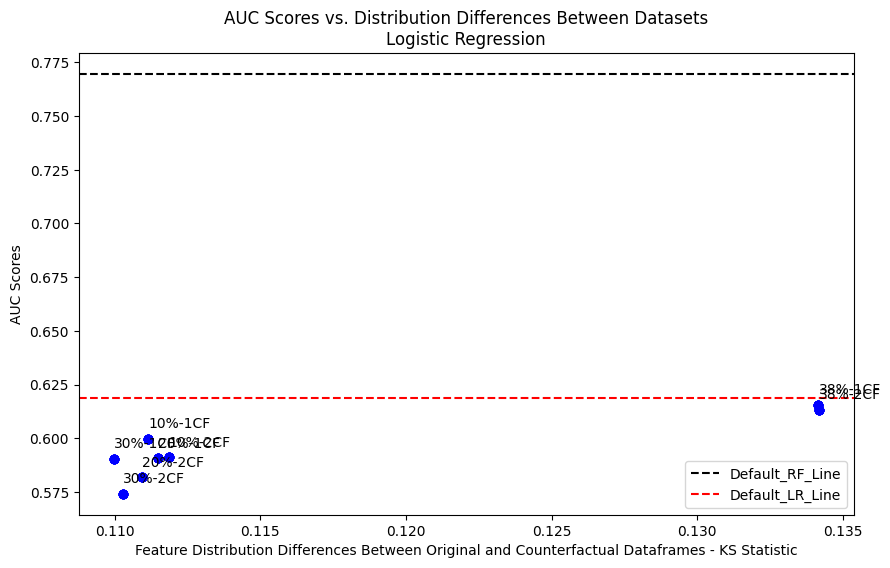

In [21]:

# Define your data
labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF', '38%-1CF', '38%-2CF']

# Show the plot
plt.figure(figsize=(10, 6))

# Plotting AUC differences
for i, label in enumerate(labels):
    plt.scatter(ks_results_list, auc_scores, color='blue')  # You can customize the color and marker
    plt.annotate(label, (ks_results_list[i], auc_scores[i]),
                 textcoords="offset points", xytext=(0,8), ha='left')


plt.axhline(y=rf_default_auc, color='k', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
plt.axhline(y=lr_default_auc, color='r', linestyle='--', label="Default_LR_Line")  # Plot RF_line as a horizontal line

# Add labels, title, and legend
plt.title('AUC Scores vs. Distribution Differences Between Datasets\nLogistic Regression')
plt.xlabel('Feature Distribution Differences Between Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Scores')
plt.legend()

# Show the plot
plt.show()


In [16]:

labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF', '38%-1CF', '38%-2CF' ]

# Show the plot
plt.figure(figsize=(10, 8))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff[i]),
                 textcoords="offset points", xytext=(0,8), ha='left')
plt.title('AUC Score difference vs. Difference in the Distribution of Features ')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference model trained on')
plt.show()

NameError: name 'auc_diff' is not defined

<Figure size 1000x800 with 0 Axes>

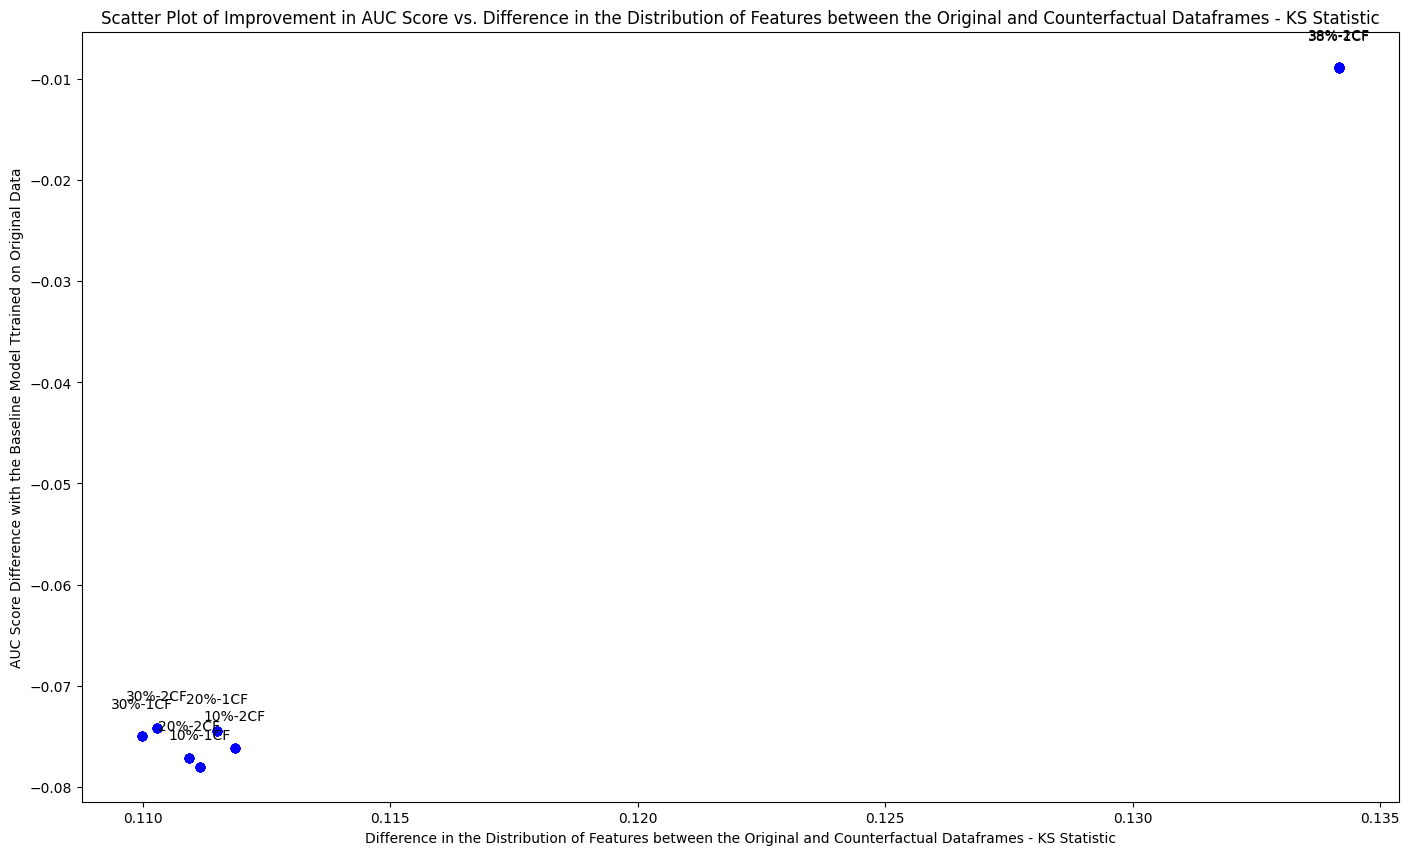

In [ ]:

labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF', '38%-1CF', '38%-2CF' ]

# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_cf, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_cf[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()